In [1]:
import os, sys
parent = os.path.abspath('../..')

if not parent in sys.path: sys.path.append(parent)

import matplotlib.pyplot as plt

from src.bradley_terry.bradley_terry import *
from src.utilities import *
from src.pairings import *

In [2]:
N = 500

/Users/fcrz/Code/projects/massive-voting-systems/src/bradley_terry/bradley_terry.py:25: RuntimeWarning: invalid value encountered in scalar divide
  return W_i / D


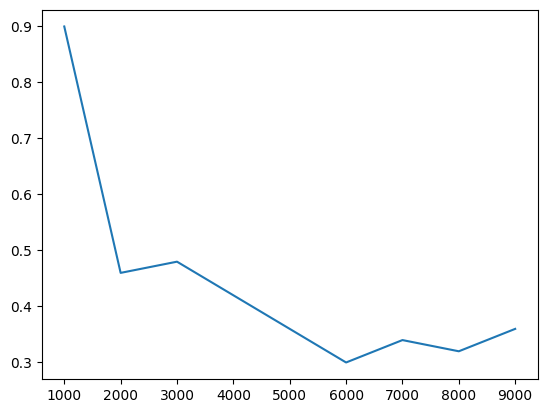

In [4]:
budget = range(1000, 10000, 1000)
L = [BradleyTerry(N, b, Random, rematch=1, p=0.9).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

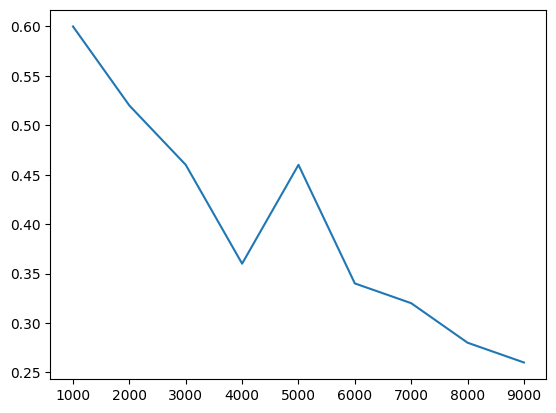

In [6]:
budget = range(1000, 10000, 1000)
L = [BradleyTerry(N, b, RandomCycles, rematch=1, p=0.9).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

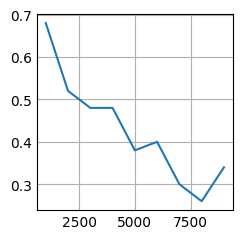

In [14]:
budget = range(1000, 10000, 1000)
L = [BradleyTerry(N, b, CCBiggest, rematch=1, p=0.9).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

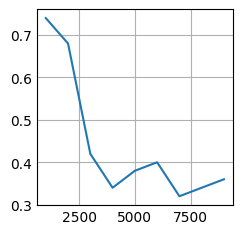

In [15]:
budget = range(1000, 10000, 1000)
L = [BradleyTerry(N, b, CCZip, rematch=1, p=0.9).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

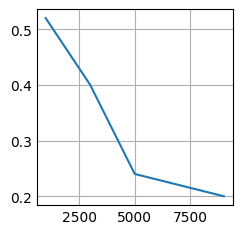

In [16]:
## SLOW! (19m37s to compute)

budget = range(1000, 10000, 2000)
L = [BradleyTerry(N, b, Reachability, rematch=1, p=0.9).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

In [5]:
L

[0.62, 0.38, 0.19999999999999996, 0.12, 0.12]

In [10]:
BradleyTerry(N, 5000, Reachability, rematch=1, p=0.9).score()

0.21999999999999997

Bradley terry performs best when choosing pairings optimizing for reachability

In [2]:
N = 500
b = 15000

L1 = [BradleyTerry(N, b, Random, p=0.9).score() for _ in range(20)]
L2 = [BradleyTerry(N, b, RandomCycles, p=0.9).score() for _ in range(20)]
L3 = [BradleyTerry(N, b, CCZip, p=0.9).score() for _ in range(20)]
L4 = [BradleyTerry(N, b, Reachability, p=0.9).score() for _ in range(20)]

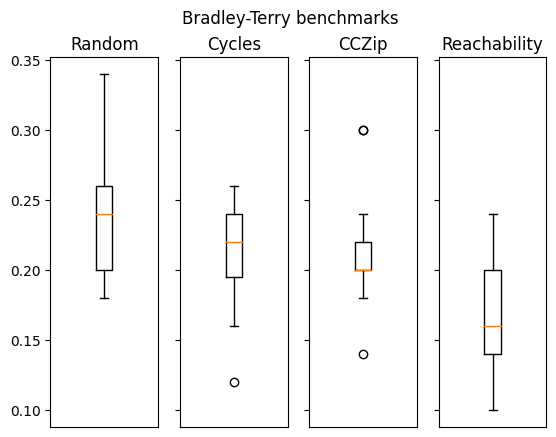

In [4]:
fig, axes = plt.subplots(1, 4, sharey=True)
fig.suptitle('Bradley-Terry benchmarks')

axes[0].boxplot(L1)
axes[0].set_title('Random')

axes[1].boxplot(L2)
axes[1].set_title('Cycles')

axes[2].boxplot(L3)
axes[2].set_title('CCZip')

axes[3].boxplot(L4)
axes[3].set_title('Reachability')

for ax in axes:
  ax.get_xaxis().set_visible(False)



In [5]:
import json
with open("benchmark.json","w") as f:
  json.dump({"Random": L1, "Cycles": L2, "CCZip": L3, "Reachability": L4}, f, indent=2)